In [1]:
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val   = pd.read_csv('../data/processed/X_val.csv')
X_test  = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_val   = pd.read_csv('../data/processed/y_val.csv').values.ravel()
y_test  = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print("Data loaded successfully")


Data loaded successfully


In [3]:
start = time.time()

dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=50,
    random_state=42
)

dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_val)
dt_probs = dt_model.predict_proba(X_val)[:, 1]

dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_val, dt_preds),
    'Precision': precision_score(y_val, dt_preds),
    'Recall': recall_score(y_val, dt_preds),
    'F1_Score': f1_score(y_val, dt_preds),
    'ROC_AUC': roc_auc_score(y_val, dt_probs),
    'Training_Time': time.time() - start
}

joblib.dump(dt_model, '../models/decision_tree.pkl')

dt_metrics


{'Model': 'Decision Tree',
 'Accuracy': 0.6601731601731602,
 'Precision': 0.5683453237410072,
 'Recall': 0.44886363636363635,
 'F1_Score': 0.5015873015873016,
 'ROC_AUC': 0.7097504767959313,
 'Training_Time': 0.03370952606201172}

### Decision Tree – Research Answers

**Q1: What is max_depth?**  
Maximum depth of the tree. Controls complexity.

**Q2: What happens if max_depth is too large?**  
Model overfits and memorizes training data.

**Q3: How to prevent overfitting?**  
Limit max_depth, increase min_samples_split, pruning.


In [4]:
start = time.time()

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)[:, 1]

rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_val, rf_preds),
    'Precision': precision_score(y_val, rf_preds),
    'Recall': recall_score(y_val, rf_preds),
    'F1_Score': f1_score(y_val, rf_preds),
    'ROC_AUC': roc_auc_score(y_val, rf_probs),
    'Training_Time': time.time() - start
}

joblib.dump(rf_model, '../models/random_forest.pkl')

rf_metrics


{'Model': 'Random Forest',
 'Accuracy': 0.6796536796536796,
 'Precision': 0.5777777777777777,
 'Recall': 0.5909090909090909,
 'F1_Score': 0.5842696629213483,
 'ROC_AUC': 0.7447949777495232,
 'Training_Time': 0.4230325222015381}

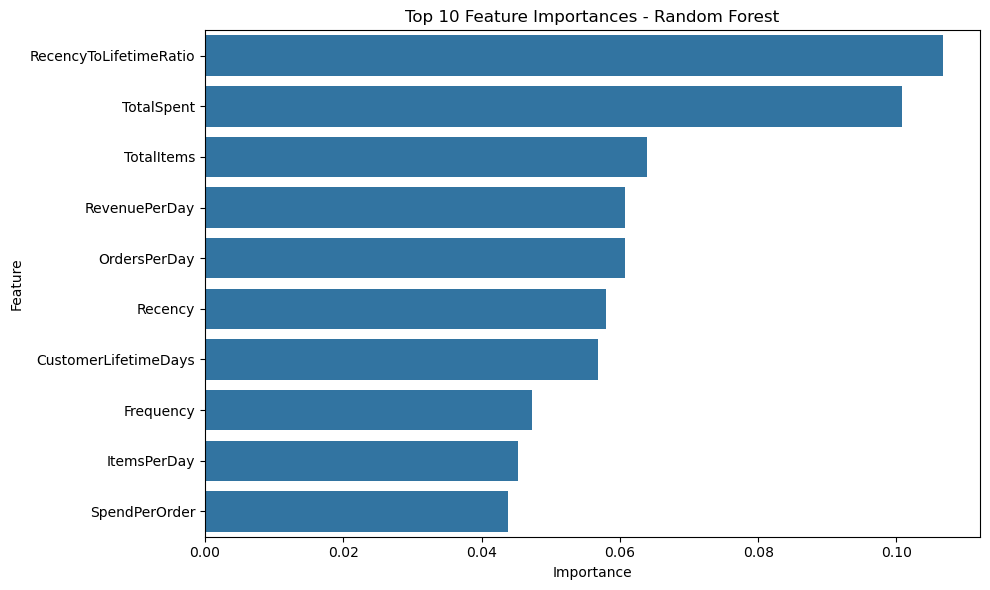

In [5]:
importances = rf_model.feature_importances_
features = X_train.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi)
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.savefig('../visualizations/random_forest_feature_importance.png')
plt.show()


### Random Forest – Research Answers

**Q1: What is an ensemble method?**  
Combines multiple models to improve performance.

**Q2: How many trees to use?**  
100–300 is usually sufficient.

**Q3: Why better than Decision Tree?**  
Reduces variance and overfitting.


In [6]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [7]:
from xgboost import XGBClassifier

start = time.time()

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)
xgb_probs = xgb_model.predict_proba(X_val)[:, 1]

xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_val, xgb_preds),
    'Precision': precision_score(y_val, xgb_preds),
    'Recall': recall_score(y_val, xgb_preds),
    'F1_Score': f1_score(y_val, xgb_preds),
    'ROC_AUC': roc_auc_score(y_val, xgb_probs),
    'Training_Time': time.time() - start
}

joblib.dump(xgb_model, '../models/xgboost.pkl')

xgb_metrics


{'Model': 'XGBoost',
 'Accuracy': 0.6688311688311688,
 'Precision': 0.5680473372781065,
 'Recall': 0.5454545454545454,
 'F1_Score': 0.5565217391304348,
 'ROC_AUC': 0.7354378575969486,
 'Training_Time': 0.23691630363464355}

### XGBoost – Research Answers

**Q1: Boosting vs Bagging?**  
Boosting learns sequentially, bagging learns independently.

**Q2: learning_rate?**  
Controls step size, lower = better generalization.

**Q3: Avoid overfitting?**  
Lower learning_rate, limit depth, early stopping.


In [8]:
start = time.time()

mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp_model.fit(X_train, y_train)

mlp_preds = mlp_model.predict(X_val)
mlp_probs = mlp_model.predict_proba(X_val)[:, 1]

mlp_metrics = {
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_val, mlp_preds),
    'Precision': precision_score(y_val, mlp_preds),
    'Recall': recall_score(y_val, mlp_preds),
    'F1_Score': f1_score(y_val, mlp_preds),
    'ROC_AUC': roc_auc_score(y_val, mlp_probs),
    'Training_Time': time.time() - start
}

joblib.dump(mlp_model, '../models/neural_network.pkl')

mlp_metrics


c:\Users\arepa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Model': 'Neural Network',
 'Accuracy': 0.6363636363636364,
 'Precision': 0.5217391304347826,
 'Recall': 0.5454545454545454,
 'F1_Score': 0.5333333333333333,
 'ROC_AUC': 0.6863278766687858,
 'Training_Time': 2.2119061946868896}

### Neural Network – Research Answers

**Q1: What is a hidden layer?**  
Intermediate layer that learns patterns.

**Q2: Too many layers?**  
Overfitting and slow training.

**Q3: Prevent overfitting?**  
Regularization, fewer layers, early stopping.


In [9]:
model_comparison = pd.DataFrame([
    dt_metrics,
    rf_metrics,
    xgb_metrics,
    mlp_metrics
])

model_comparison.to_csv('../models/model_comparison.csv', index=False)
model_comparison


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Training_Time
0,Decision Tree,0.660173,0.568345,0.448864,0.501587,0.709750,0.033710
1,Random Forest,0.679654,0.577778,0.590909,0.584270,0.744795,0.423033
2,XGBoost,0.668831,0.568047,0.545455,0.556522,0.735438,0.236916
3,Neural Network,0.636364,0.521739,0.545455,0.533333,0.686328,2.211906


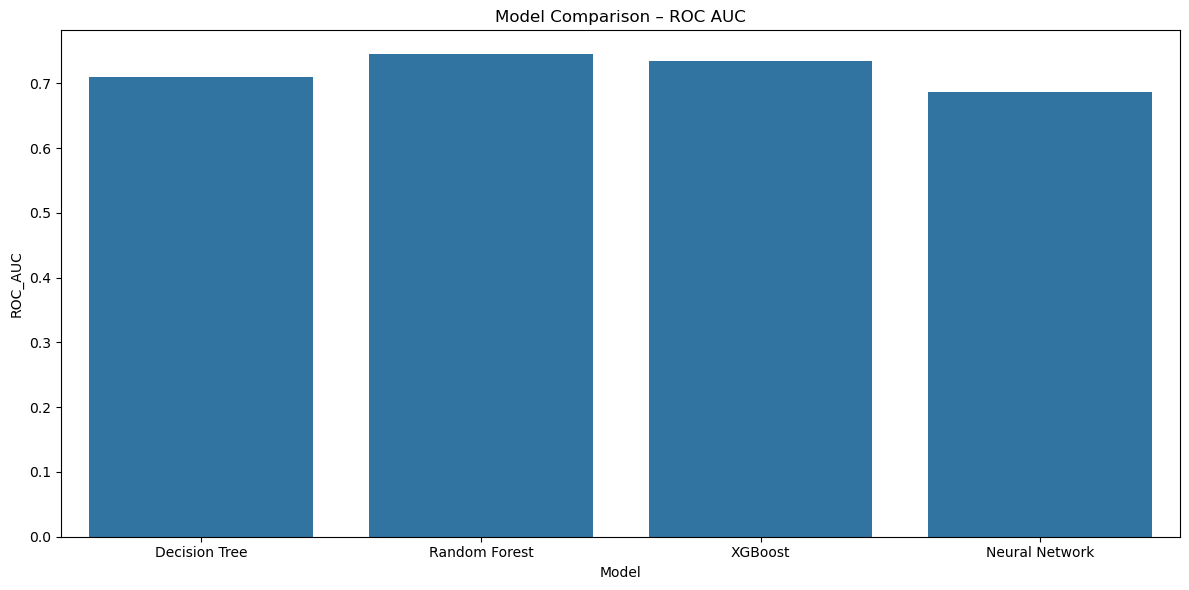

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='ROC_AUC', data=model_comparison)
plt.title('Model Comparison – ROC AUC')
plt.tight_layout()
plt.savefig('../visualizations/model_comparison.png')
plt.show()
